# Project Start Here

In [2]:
import requests as re
import pandas as pd
import numpy as np
import json
import math
from pandas.io.json import json_normalize

## get the data
---
- Get the data by api.
- Save the data as 'raw.csv', which is the raw data ready for data preporcessing.
---
Totaly 2,000 pics of data sorted by time from resent to past.

In [11]:
def get_data():
    zed_index = '?'
    include_sold = '1'
    page_number = 1
    listing_status = 'sale'
    page_size = '100'
    order_by = 'age'
    area = 'somerset'
    api_key = 'hzxt3c3w339feeah3w8knbpu'
    
    save_list = []
    for page_number in range(1, 59):
        url = f"http://api.zoopla.co.uk/api/v1/property_listings.js?zed_index=?&include_sold=1&page_number={page_number}&listing_status=sale&page_size=100&order_by=age&area=somerset&api_key=9dud55d9tr4ptf7umqt4rmf6"
        response = re.get(url)
        json_list = response.json()['listing']
        save_list += json_list
        
    df = json_normalize(save_list)
    df.to_csv('raw.csv')

In [ ]:
        #df = json_normalize(response.json()['listing'])

In [12]:
## Load Raw Data
get_data()

## Read the Data

In [4]:
raw = pd.read_csv('raw.csv')

In [5]:
raw.head()

,Unnamed: 0,agent_address,agent_logo,agent_name,agent_phone,bills_included,category,country,country_code,county,...,price_change,price_change_summary.direction,price_change_summary.last_updated_date,price_change_summary.percent,price_modifier,property_type,short_description,status,street_name,thumbnail_url
0,0,"Norton House, 74-76 High Street, Midsomer Nort...",https://st.zoocdn.com/zoopla_static_agent_logo...,Andrews - Midsomer Norton,01761 231187,NaN,Residential,England,gb,Bath & N E Somerset,...,"[{'direction': '', 'date': '2019-06-18 01:22:5...",NaN,NaN,NaN,NaN,Detached bungalow,This substantial detached residence is situate...,for_sale,Midsomer Norton,https://lid.zoocdn.com/80/60/ee2473a22760dc11d...
1,1,"Nationwide Estate Agent, Head Office: Suite 7,...",https://st.zoocdn.com/zoopla_static_agent_logo...,"Purplebricks, Head Office",024 7511 8874,NaN,Residential,England,gb,North Somerset,...,"[{'direction': '', 'date': '2019-06-17 23:00:1...",NaN,NaN,NaN,NaN,Flat,PurpleBricks are pleased to offer this spaciou...,for_sale,Park Place,https://lid.zoocdn.com/80/60/f8259664d28e259b1...
2,2,"13 Waterloo Street, Weston-Super-Mare",https://st.zoocdn.com/zoopla_static_agent_logo...,Stephen & Co,01934 611064,NaN,Residential,England,gb,North Somerset,...,"[{'direction': '', 'date': '2019-06-17 19:15:5...",NaN,NaN,NaN,NaN,Flat,"<p class=""top"">Located in a central position w...",for_sale,16 Hans Price Close,https://lid.zoocdn.com/80/60/388895031e79ed491...
3,3,"21 East Street, Ilminster",https://st.zoocdn.com/zoopla_static_agent_logo...,Symonds & Sampson - Ilminster,01460 312997,NaN,Residential,England,gb,Somerset,...,"[{'direction': '', 'date': '2019-06-17 13:00:1...",NaN,NaN,NaN,guide_price,Detached house,A quintessential former Grade II listed farmho...,for_sale,Ilminster Somerset,https://lid.zoocdn.com/80/60/c9daa516c454ca556...
4,4,"53 High Street, Taunton",https://st.zoocdn.com/zoopla_static_agent_logo...,Connells - Taunton,01823 429046,NaN,Residential,England,gb,Somerset,...,"[{'direction': '', 'date': '2019-06-17 17:47:5...",NaN,NaN,NaN,NaN,Detached house,This stylish four bedroom detached family home...,for_sale,Harp Chase,https://lid.zoocdn.com/80/60/6eceb0adec59cac58...


### For get data testing
---
Testing the api and csv save method

In [15]:
url = 'http://api.zoopla.co.uk/api/v1/property_listings.js?zed_index=?&include_sold=1&page_number=58&listing_status=sale&page_size=100&order_by=age&area=somerset&api_key=9dud55d9tr4ptf7umqt4rmf6'
response = re.get(url)
df = json_normalize(response.json()['listing'])
df['displayable_address']

0     Upper Church Road, Weston-Super-Mare, North So...
1     Locking Road, Weston-Super-Mare, North Somerse...
2                          Burrowbridge, Bridgwater TA7
3                           Western Lane, Minehead TA24
4                              Alfred Street, Wells BA5
5                        Ashcombe Court, Ilminster TA19
6                              Silver Street, Wells BA5
7                            Whiteball, Wellington TA21
8                     Magdalene Street, Glastonbury BA6
9     Greenacres Park, Coppits Hill, Yeovil, Somerse...
10                              Bathealton, Taunton TA4
11                           Monmouth Court, Chard TA20
12                       Brompton Regis, Dulverton TA22
13                   Priory Gardens, Burnham-On-Sea TA8
14                   Eden Croft, Weston-Super-Mare BS24
15                 Station Road, Weston-Super-Mare BS23
16                              Four Forks, Spaxton TA5
17    Ivy House Park (Ref 5613), Henlade, Taunto

# Data Preporcessing

In [6]:
raw.columns

Index(['Unnamed: 0', 'agent_address', 'agent_logo', 'agent_name',
       'agent_phone', 'bills_included', 'category', 'country', 'country_code',
       'county', 'description', 'details_url', 'displayable_address',
       'first_published_date', 'floor_area.max_floor_area.units',
       'floor_area.max_floor_area.value', 'floor_area.min_floor_area.units',
       'floor_area.min_floor_area.value', 'floor_plan', 'furnished_state',
       'image_150_113_url', 'image_354_255_url', 'image_50_38_url',
       'image_645_430_url', 'image_80_60_url', 'image_caption', 'image_url',
       'last_published_date', 'latitude', 'letting_fees', 'listing_id',
       'listing_status', 'location_is_approximate', 'longitude', 'new_home',
       'num_bathrooms', 'num_bedrooms', 'num_floors', 'num_recepts', 'outcode',
       'post_town', 'price', 'price_change', 'price_change_summary.direction',
       'price_change_summary.last_updated_date',
       'price_change_summary.percent', 'price_modifier', 'propert

In [7]:
useful_information = raw[['latitude', 'longitude', 'property_type','category', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts', 'outcode', 'post_town', 'street_name', 'new_home', 'price']].reset_index()

In [8]:
hot_place = useful_information[['latitude', 'longitude', 'price']]
hot_place.to_csv('hot_place.csv', index = False)
hot_place.head()

,latitude,longitude,price
0,51.282810,-2.473855,425000
1,51.352814,-2.983661,130000
2,51.349530,-2.973079,149950
3,50.933030,-2.842047,695000
4,51.004120,-3.086580,375000


In [9]:
def new_home(value):
    if math.isnan(value):
        return 0
    else:
        return 1
    
useful_information['new_home'] = useful_information['new_home'].apply(new_home)

In [10]:
useful_information.head()

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
0,0,51.282810,-2.473855,Detached bungalow,Residential,2,3,0,1,BA3,Radstock,Midsomer Norton,0,425000
1,1,51.352814,-2.983661,Flat,Residential,1,2,0,1,BS23,Weston-super-Mare,Park Place,0,130000
2,2,51.349530,-2.973079,Flat,Residential,1,2,0,1,BS23,Weston-super-Mare,16 Hans Price Close,0,149950
3,3,50.933030,-2.842047,Detached house,Residential,2,4,0,3,TA19,Ilminster,Ilminster Somerset,0,695000
4,4,51.004120,-3.086580,Detached house,Residential,2,4,0,3,TA1,Taunton,Harp Chase,0,375000


In [11]:
cate = useful_information.drop_duplicates(['category'])
cate

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
0,0,51.28281,-2.473855,Detached bungalow,Residential,2,3,0,1,BA3,Radstock,Midsomer Norton,0,425000


In [12]:
property_type = useful_information.drop_duplicates(['property_type'])
property_type['property_type']
useful_information[useful_information['property_type'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
19,19,51.275740,-2.770467,NaN,Residential,2,4,0,2,BS27,Cheddar,Masons Way,0,305000
56,56,51.278393,-2.785265,NaN,Residential,1,2,0,1,BS27,Cheddar,Gough Place,0,220000
63,63,51.360540,-2.897348,NaN,Residential,0,2,0,1,BS22,Weston-super-Mare,Willow Gardens St. Georges,0,300000
76,76,51.440758,-2.858619,NaN,Residential,0,3,0,0,BS21,Clevedon,Clevedon,0,395000
86,86,51.093970,-3.016499,NaN,Residential,0,3,0,0,TA6,Bridgwater,North Street,0,325000
101,101,51.061756,-3.108835,NaN,Residential,1,3,0,2,TA2,Taunton,Church Lane,0,450000
115,115,51.208370,-2.649266,NaN,Residential,1,3,0,1,BA5,Wells,Union Street,0,225000
157,157,51.212510,-2.648823,NaN,Residential,1,1,0,1,BA5,Wells,Milton Lane,0,139950
185,185,51.271270,-2.778793,NaN,Residential,2,4,0,2,BS27,Cheddar,Thynne Close,0,390000
190,190,51.280010,-2.276071,NaN,Residential,0,2,0,0,BA11,Frome,Church Farm,1,155000


In [13]:
code = useful_information.drop_duplicates(['outcode'])
code['outcode']
useful_information[useful_information['outcode'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price


In [268]:
post_town = useful_information.drop_duplicates(['post_town'])
useful_information[useful_information['post_town'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
183,183,51.347470,-2.913102,Detached house,Residential,4,5,0,3,BS24,NaN,Mannock Gardens,1,499995
184,184,51.347470,-2.913102,Detached house,Residential,3,5,0,3,BS24,NaN,Mannock Gardens,1,519995
198,198,51.347470,-2.913102,Detached house,Residential,3,5,0,3,BS24,NaN,Mannock Gardens,1,514995
234,234,51.347470,-2.913102,Detached house,Residential,3,4,0,2,BS24,NaN,Mannock Gardens,1,489995
906,906,51.210240,-2.682498,Detached house,Residential,0,3,3,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,339995
1031,1031,51.210240,-2.682498,Detached house,Residential,2,4,2,2,BA5,NaN,"Wookey Hole Road, Wells",1,355000
1225,1225,51.210240,-2.682498,NaN,Residential,0,3,3,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,365995
1295,1295,51.210240,-2.682498,NaN,Residential,0,4,2,3,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,445995
1296,1296,51.210240,-2.682498,NaN,Residential,0,3,2,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,326995
1297,1297,51.210240,-2.682498,NaN,Residential,0,3,2,2,BA5,NaN,"Priory Fields, Wookey Hole Road, Wells, Somerset",1,361995


In [14]:
street_name = useful_information.drop_duplicates(['street_name'])
useful_information[useful_information['street_name'].isnull()]

,index,latitude,longitude,property_type,category,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,street_name,new_home,price
10,10,51.021255,-2.437421,Cottage,Residential,2,4,0,2,BA8,Templecombe,NaN,0,525000
22,22,50.952847,-2.647563,Terraced house,Residential,1,3,0,1,BA21,Yeovil,NaN,0,170000
32,32,51.312325,-2.830494,Detached house,Residential,0,4,0,0,BS25,Winscombe,NaN,1,0
80,80,50.970795,-2.718610,Semi-detached house,Residential,1,3,0,1,BA22,Yeovil,NaN,0,195000
285,285,50.897453,-2.996088,Detached house,Residential,2,3,0,1,TA20,Chard,NaN,0,400000
370,370,51.353786,-2.982633,Semi-detached house,Residential,0,8,0,0,BS23,Weston-super-Mare,NaN,0,290000
407,407,50.954872,-2.632728,Semi-detached house,Residential,1,3,0,2,BA21,Yeovil,NaN,0,215000
432,432,50.931190,-2.662289,Detached house,Residential,2,4,0,2,BA20,Yeovil,NaN,0,285000
434,434,50.949837,-2.816584,Detached bungalow,Residential,1,3,0,2,TA13,South Petherton,NaN,0,270000
435,435,50.948364,-2.812159,Bungalow,Residential,1,2,0,2,TA13,South Petherton,NaN,0,260000


## Naive Bayes
---
Using naive bayes to prodict the nan value

In [922]:
from sklearn import preprocessing

class LabelEncode:
    
    def __init__(self, df_data, col):
        self.le = preprocessing.LabelEncoder()
        col_name = list(df_data.drop_duplicates([col])[col])
        self.le.fit(col_name)

    def encode(self, value):
        return self.le.transform([value])[0]

In [923]:
useful_information = raw[['latitude', 'longitude', 'property_type', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts','outcode','post_town', 'new_home', 'loc_class', 'price']].reset_index()
useful_information['new_home'] = useful_information['new_home'].apply(new_home)

pt_le = LabelEncode(useful_information, 'post_town')
encode_col = pt_le.le.transform(list(useful_information['post_town']))
useful_information['post_town'] = encode_col

oc_le = LabelEncode(useful_information, 'outcode')
encode_col = oc_le.le.transform(list(useful_information['outcode']))
useful_information['outcode'] = encode_col

post_le = LabelEncode(useful_information,  'property_type')
encode_col = post_le.le.transform(list(useful_information['property_type']))
useful_information['property_type'] = encode_col

In [924]:
nan_pt = useful_information['property_type'].max()
nan_oc = useful_information['outcode'].max()
nan_post = useful_information['post_town'].max()

In [925]:
nan_pt

29

In [926]:
from sklearn.naive_bayes import GaussianNB

class naive_bayes:
    def __init__(self, df_data, col, nan_index):
        self.col = col
        self.model = GaussianNB()
        train = df_data[df_data[col] != nan_index]
        train_X = df_data[df_data.columns.difference([col])]
        train_Y = df_data[[col]]
        self.predict_X = df_data[df_data[col] == nan_index]
        self.predict_X = self.predict_X[self.predict_X.columns.difference([col])]  
        self.model.fit(train_X, train_Y)
        
    def predict(self):
        self.result = self.model.predict(self.predict_X)
        self.predict_X[self.col] = self.result
        return self.predict_X

In [927]:
nv_m = naive_bayes(useful_information, 'property_type', nan_pt)

C:\software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [928]:
result = nv_m.predict()
result = result.set_index('index')

In [929]:
useful_information = useful_information.set_index('index')
useful_information.update(result)

In [930]:
useful_information['property_type'].max()

28.0

In [931]:
nv_m = naive_bayes(useful_information, 'outcode', nan_oc)
result = nv_m.predict()
useful_information.update(result)

C:\software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [932]:
print(nan_oc)
print(useful_information.outcode.max())

57
56.0


In [933]:
nv_m = naive_bayes(useful_information, 'post_town', nan_post)
result = nv_m.predict()
useful_information.update(result)

C:\software\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [934]:
print(nan_post)
print(useful_information.post_town.max())

45
44.0


In [935]:
useful_information.sample(10)

,latitude,longitude,property_type,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,new_home,loc_class,price
index,,,,,,,,,,,,
206,51.221420,-2.637450,7.0,1.0,4.0,0.0,3.0,10.0,40.0,0.0,0.0,325000.0
1020,51.225765,-2.986849,22.0,0.0,2.0,0.0,0.0,1.0,17.0,0.0,1.0,229500.0
312,51.170120,-2.977322,23.0,1.0,3.0,0.0,0.0,55.0,4.0,1.0,6.0,84000.0
608,51.095390,-2.524815,8.0,2.0,3.0,0.0,1.0,12.0,8.0,1.0,0.0,290000.0
2487,50.916290,-2.660555,4.0,1.0,3.0,0.0,3.0,7.0,44.0,0.0,0.0,275000.0
5508,51.057255,-2.611721,4.0,2.0,5.0,0.0,3.0,36.0,29.0,0.0,2.0,735000.0
584,50.906720,-3.122442,26.0,2.0,4.0,0.0,1.0,51.0,33.0,0.0,0.0,265000.0
5228,51.372820,-2.804407,23.0,0.0,3.0,0.0,0.0,28.0,5.0,0.0,1.0,234000.0
3383,51.333183,-2.823220,4.0,0.0,3.0,0.0,0.0,20.0,43.0,0.0,5.0,425000.0


In [936]:
useful_information['room_sum'] = useful_information.num_bathrooms + useful_information.num_bedrooms + useful_information.num_floors + useful_information.num_recepts

In [937]:
useful_information = useful_information[useful_information['room_sum'] != 0]

In [938]:
useful_information = useful_information.drop('room_sum', axis=1)

In [939]:
useful_information['loc_class'] = useful_information.loc_class.apply(reset_class)
useful_information.head()

,latitude,longitude,property_type,num_bathrooms,num_bedrooms,num_floors,num_recepts,outcode,post_town,new_home,loc_class,price
index,,,,,,,,,,,,
0,51.282810,-2.473855,6.0,2.0,3.0,0.0,1.0,8.0,26.0,0.0,class3,425000.0
1,51.352814,-2.983661,12.0,1.0,2.0,0.0,1.0,18.0,41.0,0.0,class4,130000.0
2,51.349530,-2.973079,12.0,1.0,2.0,0.0,1.0,18.0,41.0,0.0,class4,149950.0
3,50.933030,-2.842047,7.0,2.0,4.0,0.0,3.0,44.0,20.0,0.0,class2,695000.0
4,51.004120,-3.086580,7.0,2.0,4.0,0.0,3.0,34.0,33.0,0.0,class3,375000.0


## Line Regression

In [940]:
df_line_regression = useful_information[['latitude','longitude','property_type', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts', 'outcode', 'post_town', 'new_home', 'loc_class', 'price']]

In [941]:
decode_col = pt_le.le.inverse_transform(list(df_line_regression['post_town'].astype(int)))
df_line_regression['post_town'] = decode_col

decode_col = oc_le.le.inverse_transform(list(df_line_regression['outcode'].astype(int)))
df_line_regression['outcode'] = decode_col

decode_col = post_le.le.inverse_transform(list(df_line_regression['property_type'].astype(int)))
df_line_regression['property_type'] = decode_col

C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\software\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [942]:
df_line_regression = pd.get_dummies(df_line_regression)

In [943]:
df_line_regression[df_line_regression.duplicated()].head()

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,price,property_type_Barn conversion,property_type_Block of flats,...,post_town_Weston-super-Mare,post_town_Wincanton,post_town_Winscombe,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class_other
index,,,,,,,,,,,,,,,,,,,,,
93,51.227390,-2.304484,2.0,3.0,2.0,2.0,1.0,294995.0,0,0,...,0,0,0,0,1,0,0,0,0,0
148,51.109886,-3.012591,0.0,2.0,0.0,0.0,1.0,129500.0,0,0,...,0,0,0,0,0,0,0,0,1,0
149,51.109886,-3.012591,0.0,2.0,0.0,0.0,1.0,129500.0,0,0,...,0,0,0,0,0,0,0,0,1,0
151,51.109886,-3.012591,0.0,2.0,0.0,0.0,1.0,127500.0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,51.109886,-3.012591,0.0,2.0,0.0,0.0,1.0,127500.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [944]:
df_line_regression.drop_duplicates()

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,price,property_type_Barn conversion,property_type_Block of flats,...,post_town_Weston-super-Mare,post_town_Wincanton,post_town_Winscombe,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class_other
index,,,,,,,,,,,,,,,,,,,,,
0,51.282810,-2.473855,2.0,3.0,0.0,1.0,0.0,425000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,51.352814,-2.983661,1.0,2.0,0.0,1.0,0.0,130000.0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,51.349530,-2.973079,1.0,2.0,0.0,1.0,0.0,149950.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,50.933030,-2.842047,2.0,4.0,0.0,3.0,0.0,695000.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,51.004120,-3.086580,2.0,4.0,0.0,3.0,0.0,375000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,51.329060,-2.961752,0.0,2.0,0.0,0.0,0.0,135000.0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,51.347470,-2.942667,1.0,2.0,0.0,1.0,0.0,164950.0,0,0,...,1,0,0,0,0,1,0,0,0,0
7,51.027775,-3.134305,2.0,3.0,0.0,1.0,1.0,269995.0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,51.027775,-3.134305,2.0,4.0,0.0,2.0,1.0,319995.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [945]:
df_line_regression = df_line_regression[df_line_regression.price != 0]

In [946]:
df_line_regression.head()

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,price,property_type_Barn conversion,property_type_Block of flats,...,post_town_Weston-super-Mare,post_town_Wincanton,post_town_Winscombe,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class_other
index,,,,,,,,,,,,,,,,,,,,,
0,51.282810,-2.473855,2.0,3.0,0.0,1.0,0.0,425000.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,51.352814,-2.983661,1.0,2.0,0.0,1.0,0.0,130000.0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,51.349530,-2.973079,1.0,2.0,0.0,1.0,0.0,149950.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,50.933030,-2.842047,2.0,4.0,0.0,3.0,0.0,695000.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,51.004120,-3.086580,2.0,4.0,0.0,3.0,0.0,375000.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [947]:
def to_end(value):
    return value

df_line_regression['new_price'] = df_line_regression['price'].apply(to_end)

In [948]:
df_line_regression = df_line_regression.drop('price', axis=1)

In [949]:
df_line_regression.head()

,latitude,longitude,num_bathrooms,num_bedrooms,num_floors,num_recepts,new_home,property_type_Barn conversion,property_type_Block of flats,property_type_Bungalow,...,post_town_Wincanton,post_town_Winscombe,post_town_Yeovil,loc_class_class0,loc_class_class1,loc_class_class2,loc_class_class3,loc_class_class4,loc_class_class_other,new_price
index,,,,,,,,,,,,,,,,,,,,,
0,51.282810,-2.473855,2.0,3.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,425000.0
1,51.352814,-2.983661,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,130000.0
2,51.349530,-2.973079,1.0,2.0,0.0,1.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,149950.0
3,50.933030,-2.842047,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,695000.0
4,51.004120,-3.086580,2.0,4.0,0.0,3.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,375000.0


## log price

In [950]:
data = np.array(df_line_regression)

In [951]:
price = data[:,-1]

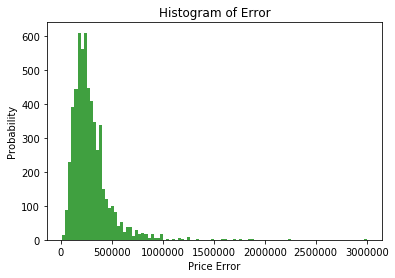

In [952]:
## Probability distributions of price
n, bins, patches = plt.hist(price, 100, facecolor='g', alpha=0.75)
plt.xlabel('Price Error')
plt.ylabel('Probability')
plt.title('Histogram of Error')
plt.show()

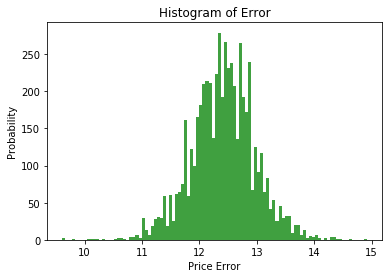

[ 425000.  130000.  149950. ... 1875000.  268000.  225000.]


In [953]:
log_price = np.log(price)
n, bins, patches = plt.hist(log_price, 100, facecolor='g', alpha=0.75)
plt.xlabel('Price Error')
plt.ylabel('Probability')
plt.title('Histogram of Error')
plt.show()
print(np.exp(log_price))

## Get Trining Set and Data Set

In [954]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [955]:
data = np.array(df_line_regression)
np.random.shuffle(data)
number_test = int(0.3 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [956]:
import sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_X , train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [957]:
hat_Y = model.predict(test_X)

In [958]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})

In [959]:
dataset.sort_values(by=['hat_Y'])

,hat_Y,test_Y
788,-2.077256e+19,565000.0
1301,-3.094045e+18,114950.0
1197,5.840500e+04,70000.0
637,6.819700e+04,69950.0
1608,7.101300e+04,75000.0
954,7.702900e+04,60000.0
15,7.741300e+04,70000.0
964,7.888500e+04,65000.0
675,7.981300e+04,14995.0
1418,8.224500e+04,23995.0


In [960]:
dataset = dataset[dataset.hat_Y > 0]
dataset = dataset[dataset.hat_Y < 100000000]

In [961]:
hat_Y = np.array(dataset.hat_Y)
test_Y = np.array(dataset.test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.8784937132309505

## Linear Regression with Log_price

In [962]:
data = np.array(df_line_regression)
data[:, -1] = log_price

In [963]:
np.random.shuffle(data)
number_test = int(0.3 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [964]:
## init the model
model = LinearRegression()
model.fit(train_X , train_Y)

## predict
hat_Y = model.predict(test_X)

In [965]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sample(5)

,hat_Y,test_Y
112,13.370090,13.337475
450,12.616795,12.691580
836,11.629856,11.283512
88,12.157078,11.982929
1317,12.230442,12.013701


In [966]:
dataset = dataset[dataset.hat_Y > 0]
dataset = dataset[dataset.hat_Y < 100000]

In [967]:
hat_Y = np.array(dataset.hat_Y)
test_Y = np.array(dataset.test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.9899916119011982

In [968]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.871960400600067

In [969]:
hat_Y

array([216902.82961271, 213383.71877876, 117683.55302982, ...,
       215582.99172596, 313288.73604656, 106656.20202123])

(0.26859504132231404, 0.24557260920897284, 0.3382526564344746, 0.14757969303423848)


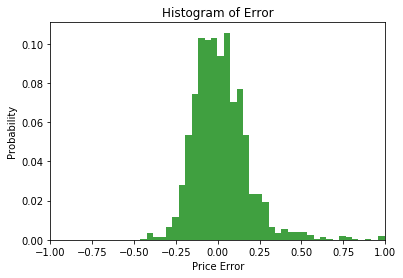

In [970]:
da = selfAnalysis(hat_Y, test_Y)
print(da.analysis())
da.display()

## Neural Networks

In [971]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

data = np.array(df_line_regression)
data[:,-1] = log_price
np.random.shuffle(data)
number_test = int(0.3 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [972]:
train_X.shape

(3969, 143)

In [978]:
train_Y.shape

(3969,)

In [979]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 10), max_iter=1000, alpha=1e-5)
mlp.fit(train_X, train_Y)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [980]:
test_X = X[:number_test]
test_Y = Y[:number_test]
hat_Y = mlp.predict(test_X)

In [981]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sort_values(by=['hat_Y']).sample(10)

,hat_Y,test_Y
813,12.141481,12.128111
195,12.218415,12.206073
1606,12.759847,12.611538
1498,12.032594,12.013701
301,12.129145,11.982617
1220,12.124423,12.323856
189,11.933564,11.775290
248,12.954424,13.171154
1301,11.574247,11.798104
1096,13.000656,12.873902


In [982]:
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.9834047303547261

In [983]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

-2.564813309106541

In [984]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sample(10)

,hat_Y,test_Y
839,9.999303e+04,114995.0
420,3.664770e+05,325000.0
1587,1.963407e+05,225000.0
1517,1.902866e+05,187500.0
324,1.035397e+05,60000.0
1069,2.755622e+05,325000.0
1674,2.752536e+05,299950.0
1585,4.163119e+05,425000.0
595,8.568065e+06,495000.0
1597,1.127505e+05,125000.0


## Random Forest Regressor

In [996]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=25, random_state=0,  n_estimators=100)

In [997]:
rf_regression = useful_information[['latitude','longitude','property_type', 'num_bathrooms', 'num_bedrooms','num_floors', 'num_recepts', 'outcode', 'post_town', 'new_home', 'price']]

In [998]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

data = np.array(df_line_regression)
data[:,-1] = np.log(data[:,-1])
np.random.shuffle(data)
number_test = int(0.3 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [999]:
regr.fit(train_X, train_Y)
hat_Y = regr.predict(test_X)

In [1000]:
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.9916090615879006

In [1001]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.8959814069503254

In [1002]:
dataset = pd.DataFrame({'hat_Y':hat_Y,'test_Y':test_Y})
dataset.sample(5)

,hat_Y,test_Y
1618,409309.948325,475000.0
1140,221400.655632,175000.0
366,313293.912334,352950.0
1647,118598.286143,135000.0
1388,399571.484675,375000.0


(0.31569664902998235, 0.29747207524985303, 0.3315696649029982, 0.05526161081716637)


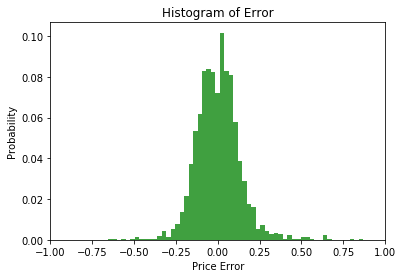

In [1005]:
da = selfAnalysis(hat_Y, test_Y)
print(da.analysis())
da.display()

## KNN Regressor

In [1025]:
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

data = np.array(df_line_regression)
data[:,-1] = np.log(data[:,-1])
np.random.shuffle(data)
number_test = int(0.3 * len(data))
X = data[:,:-1]
Y = data[:,-1]
scaler.fit(X)
X = scaler.transform(X)

test_data = data[:number_test]
train_data = data[number_test:]
train_X = X[number_test:]
train_Y = Y[number_test:]
test_X = X[:number_test]
test_Y = Y[:number_test]

In [1026]:
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
model.fit(train_X, train_Y)
hat_Y = model.predict(test_X)

In [1027]:
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.9867313186218996

In [1028]:
hat_Y = np.exp(hat_Y)
test_Y = np.exp(test_Y)
(1- abs(hat_Y - test_Y)/test_Y).mean()

0.8343208904074092

(0.2516166960611405, 0.21810699588477367, 0.3556731334509112, 0.1746031746031746)


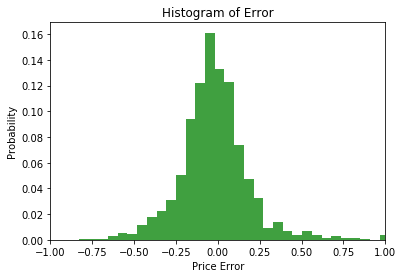

In [1029]:
da = selfAnalysis(hat_Y, test_Y)
print(da.analysis())
da.display()

## Data Analysis

In [1004]:
import matplotlib.pyplot as plt

class selfAnalysis:
    
    def __init__(self, hat_Y, Y):
        self.hat_Y = hat_Y
        self.Y = Y
        self.errors = (self.hat_Y - self.Y)/self.Y
        
    def analysis(self):
        length = len(self.Y)
        percentage_in5 = []
        percentage_in10 = []
        percentage_in20 = []
        percentage_other = []
        for error in self.errors:
            if abs(error) <= 0.05:
                percentage_in5.append(error)
            elif abs(error) <= 0.1:
                percentage_in10.append(error)
            elif abs(error) <= 0.25:
                percentage_in20.append(error)
            else:
                percentage_other.append(error)
        
        return (len(percentage_in5)/length, len(percentage_in10)/length, len(percentage_in20)/length, len(percentage_other)/length)
    
    def display(self):
        weights = np.ones_like(self.errors)/float(len(self.errors))
        n, bins, patches = plt.hist(self.errors, 100, facecolor='g', alpha=0.75, weights=weights)
        plt.xlabel('Price Error')       
        plt.xlim(-1, 1)
        plt.ylabel('Probability')
        plt.title('Histogram of Error')
        plt.show()

## NLP

In [1035]:
raw = pd.read_csv('raw.csv')

In [1036]:
raw = raw[raw.description.notnull()]

In [1037]:
text = list(raw.description)

In [1038]:
import re
def pre_process(text):
    
    # lowercase
    text=text.lower()  
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

raw['description'] = raw.description.apply(pre_process)

In [1040]:
raw['description'][2]

'located in a central position well placed for the town centre sea front and other amenities an immaculately presented bedroom first floor flat converted from the former general hospital with electric heating double glazed sash windows and a parking space accommodation with approximate measurements entrance front door with security entry system to communal hall with internal staircase to first floor door to hall night storage heater entry phone airing cupboard lounge m x m x night storage heater tv point kitchen m x m x fitted with a range of wall and base units with roll edge worksurfaces over bowl single drainer sink unit fitted oven and ring hob with concealed extractor hood over integrated fridge freezer plumbing for a washing machine tiled splashback bedroom m x m x range of fitted wardrobes with over bed cupboards and dressing table tv point electric panel heater bedroom m x m x electric panel heater shower room double cubicle with triton shower unit vanity wash basin and low lev

In [1042]:
from sklearn.feature_extraction.text import CountVectorizer
 
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)
    
#load a set of stop words
stopwords=get_stop_words("minimal-stop.txt")
 
#get the text column 
docs = raw['description'].tolist()
 
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

In [1044]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

## KMeans

In [894]:
da_price_loc = pd.read_csv('hot_place.csv')

In [895]:
price_loc = np.array(da_price_loc)

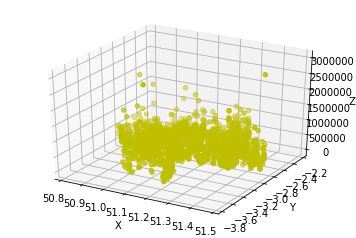

In [896]:
from mpl_toolkits.mplot3d import Axes3D

x, y, z = price_loc[:,0], price_loc[:,1], price_loc[:,2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, z, c='y')  # 绘制数据点

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

In [897]:
from sklearn.cluster import KMeans

y_pred = KMeans().fit_predict(price_loc)

In [898]:
da_price_loc['class'] = y_pred
da_price_loc.groupby('class').count()

,latitude,longitude,price
class,,,
0,1406,1406,1406
1,1907,1907,1907
2,136,136,136
3,27,27,27
4,308,308,308
5,866,866,866
6,1102,1102,1102
7,3,3,3


In [899]:
raw = pd.read_csv('raw.csv')

In [900]:
raw['loc_class'] = y_pred

In [901]:
def reset_class(value):
    if value == 0:
        return 'class0'
    elif value == 1:
        return 'class1'
    elif value == 4:
        return 'class2'
    elif value == 2 or value == 3 or value == 7:
        return 'class_other'
    elif value == 5:
        return 'class3'
    elif value == 6:
        return 'class4'

In [1006]:
raw.head()

,Unnamed: 0,agent_address,agent_logo,agent_name,agent_phone,bills_included,category,country,country_code,county,...,price_change_summary.direction,price_change_summary.last_updated_date,price_change_summary.percent,price_modifier,property_type,short_description,status,street_name,thumbnail_url,loc_class
0,0,"Norton House, 74-76 High Street, Midsomer Nort...",https://st.zoocdn.com/zoopla_static_agent_logo...,Andrews - Midsomer Norton,01761 231187,NaN,Residential,England,gb,Bath & N E Somerset,...,NaN,NaN,NaN,NaN,Detached bungalow,This substantial detached residence is situate...,for_sale,Midsomer Norton,https://lid.zoocdn.com/80/60/ee2473a22760dc11d...,5
1,1,"Nationwide Estate Agent, Head Office: Suite 7,...",https://st.zoocdn.com/zoopla_static_agent_logo...,"Purplebricks, Head Office",024 7511 8874,NaN,Residential,England,gb,North Somerset,...,NaN,NaN,NaN,NaN,Flat,PurpleBricks are pleased to offer this spaciou...,for_sale,Park Place,https://lid.zoocdn.com/80/60/f8259664d28e259b1...,6
2,2,"13 Waterloo Street, Weston-Super-Mare",https://st.zoocdn.com/zoopla_static_agent_logo...,Stephen & Co,01934 611064,NaN,Residential,England,gb,North Somerset,...,NaN,NaN,NaN,NaN,Flat,"<p class=""top"">Located in a central position w...",for_sale,16 Hans Price Close,https://lid.zoocdn.com/80/60/388895031e79ed491...,6
3,3,"21 East Street, Ilminster",https://st.zoocdn.com/zoopla_static_agent_logo...,Symonds & Sampson - Ilminster,01460 312997,NaN,Residential,England,gb,Somerset,...,NaN,NaN,NaN,guide_price,Detached house,A quintessential former Grade II listed farmho...,for_sale,Ilminster Somerset,https://lid.zoocdn.com/80/60/c9daa516c454ca556...,4
4,4,"53 High Street, Taunton",https://st.zoocdn.com/zoopla_static_agent_logo...,Connells - Taunton,01823 429046,NaN,Residential,England,gb,Somerset,...,NaN,NaN,NaN,NaN,Detached house,This stylish four bedroom detached family home...,for_sale,Harp Chase,https://lid.zoocdn.com/80/60/6eceb0adec59cac58...,5
